In [31]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [32]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [33]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ac77fd6de108f3b06b3daf794b2c11d"

In [34]:
# Create a set of random latitude and longitude combinations

# creating variables for latitudes and longitudes

lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)

# pack the latitudes and longitudes as pairs by zipping them with the zip() function

lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [36]:
# import citipy

from citipy import citipy

In [37]:
# Create a list for holding the cities.

cities = []
city_data = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

624

In [38]:
# Print the beginning of the logging. 

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [39]:
# Loop through all the cities in the list.

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bayan
Processing Record 2 of Set 1 | ho
City not found. Skipping...
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | balimo
City not found. Skipping...
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | henties bay
Processing Record 11 of Set 1 | necochea
Processing Record 12 of Set 1 | san cristobal
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | ambilobe
Processing Record 17 of Set 1 | rungata
City not found. Skipping...
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | maniitsoq
Processing Record 20 of Set 1 | wanning
Processing Record 21 of

Processing Record 34 of Set 4 | celestun
Processing Record 35 of Set 4 | terrace
Processing Record 36 of Set 4 | wajima
Processing Record 37 of Set 4 | poum
Processing Record 38 of Set 4 | altay
Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | victoria
Processing Record 41 of Set 4 | muros
Processing Record 42 of Set 4 | ribeira grande
Processing Record 43 of Set 4 | dzaoudzi
Processing Record 44 of Set 4 | bandarbeyla
Processing Record 45 of Set 4 | grand gaube
Processing Record 46 of Set 4 | bud
Processing Record 47 of Set 4 | honningsvag
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | salinopolis
Processing Record 50 of Set 4 | dedza
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | itarema
Processing Record 3 of Set 5 | buraydah
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | zhangjiakou
Processing Record 6 of Set 5 | andros town
Processing Record 7 of Set 5 | puerto del rosario
Processing R

Processing Record 27 of Set 8 | brae
Processing Record 28 of Set 8 | gushikawa
Processing Record 29 of Set 8 | doha
Processing Record 30 of Set 8 | ilulissat
Processing Record 31 of Set 8 | cayenne
Processing Record 32 of Set 8 | barraute
Processing Record 33 of Set 8 | auki
Processing Record 34 of Set 8 | tingrela
City not found. Skipping...
Processing Record 35 of Set 8 | hualmay
Processing Record 36 of Set 8 | eyl
Processing Record 37 of Set 8 | slave lake
Processing Record 38 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 8 | arman
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | vanavara
Processing Record 42 of Set 8 | rapar
Processing Record 43 of Set 8 | rognan
Processing Record 44 of Set 8 | kovdor
Processing Record 45 of Set 8 | juegang
Processing Record 46 of Set 8 | kaeo
Processing Record 47 of Set 8 | mount gambier
Processing Record 48 of Set 8 | teguise
Processing Record 49 of Set 8 | alofi
Processing Record 50 

City not found. Skipping...
Processing Record 17 of Set 12 | chico
Processing Record 18 of Set 12 | misratah
Processing Record 19 of Set 12 | vanimo
Processing Record 20 of Set 12 | port hardy
Processing Record 21 of Set 12 | faya
Processing Record 22 of Set 12 | hohhot
Processing Record 23 of Set 12 | tsabong
Processing Record 24 of Set 12 | geraldton
Processing Record 25 of Set 12 | askiz
Processing Record 26 of Set 12 | znamenskoye
Processing Record 27 of Set 12 | goascoran
Processing Record 28 of Set 12 | klyuchi
Processing Record 29 of Set 12 | touros
Processing Record 30 of Set 12 | bloemfontein
Processing Record 31 of Set 12 | marrakesh
Processing Record 32 of Set 12 | mariental
Processing Record 33 of Set 12 | awjilah
Processing Record 34 of Set 12 | yuanping
Processing Record 35 of Set 12 | black forest
Processing Record 36 of Set 12 | havre-saint-pierre
Processing Record 37 of Set 12 | terenos
Processing Record 38 of Set 12 | fuerte olimpo
Processing Record 39 of Set 12 | koc

In [40]:
len(cities)

624

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bayan,46.08,127.40,56.62,94,100,8.19,CN,2020-06-14 21:18:13
1,Mataura,-46.19,168.86,39.00,83,97,3.00,NZ,2020-06-14 21:18:14
2,Ushuaia,-54.80,-68.30,33.80,74,40,3.36,AR,2020-06-14 21:15:44
3,Butaritari,3.07,172.79,82.58,71,66,6.42,KI,2020-06-14 21:18:14
4,Avarua,-21.21,-159.78,75.20,50,75,9.17,CK,2020-06-14 21:18:15
5,Henties Bay,-22.12,14.28,61.61,50,0,8.16,NA,2020-06-14 21:18:15
6,Necochea,-38.55,-58.74,42.01,75,0,4.00,AR,2020-06-14 21:18:15
7,San Cristobal,7.77,-72.22,91.40,41,40,18.34,VE,2020-06-14 21:18:15
8,Rikitea,-23.12,-134.97,75.99,84,35,15.99,PF,2020-06-14 21:18:16
9,College,64.86,-147.80,59.00,82,90,4.70,US,2020-06-14 21:18:16


In [43]:
# Reorder the DataFrame columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bayan,CN,2020-06-14 21:18:13,46.08,127.40,56.62,94,100,8.19
1,Mataura,NZ,2020-06-14 21:18:14,-46.19,168.86,39.00,83,97,3.00
2,Ushuaia,AR,2020-06-14 21:15:44,-54.80,-68.30,33.80,74,40,3.36
3,Butaritari,KI,2020-06-14 21:18:14,3.07,172.79,82.58,71,66,6.42
4,Avarua,CK,2020-06-14 21:18:15,-21.21,-159.78,75.20,50,75,9.17
5,Henties Bay,NA,2020-06-14 21:18:15,-22.12,14.28,61.61,50,0,8.16
6,Necochea,AR,2020-06-14 21:18:15,-38.55,-58.74,42.01,75,0,4.00
7,San Cristobal,VE,2020-06-14 21:18:15,7.77,-72.22,91.40,41,40,18.34
8,Rikitea,PF,2020-06-14 21:18:16,-23.12,-134.97,75.99,84,35,15.99
9,College,US,2020-06-14 21:18:16,64.86,-147.80,59.00,82,90,4.70


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Scatter Plots


In [45]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [47]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592175324.9621398

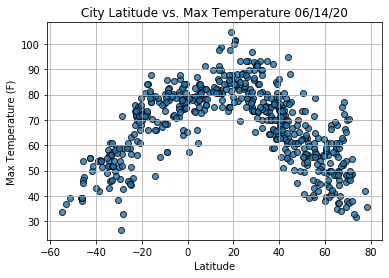

In [48]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

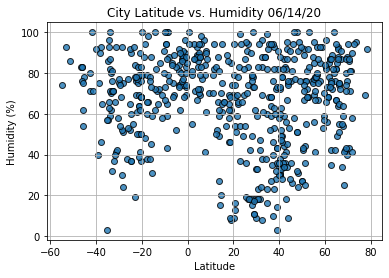

In [50]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

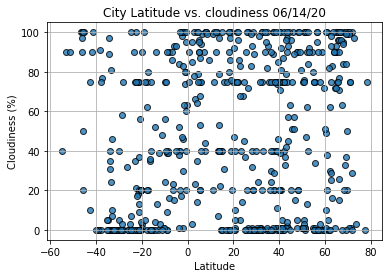

In [51]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

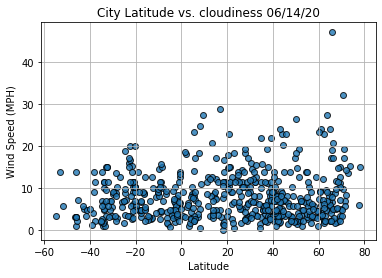

In [53]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()